In [1]:
## x,y값샘플제작

손든횟수=[1,2,3,1,1,3,1,3]
성적=[90,100,80,100,88,77,55,85]

import pandas as pd
df=pd.DataFrame(dict({'손든횟수':손든횟수, '성적':성적}))
df

,손든횟수,성적
0,1,90
1,2,100
2,3,80
3,1,100
4,1,88
5,3,77
6,1,55
7,3,85


### Part1. [단순선형회귀-최소제곱법계산식]
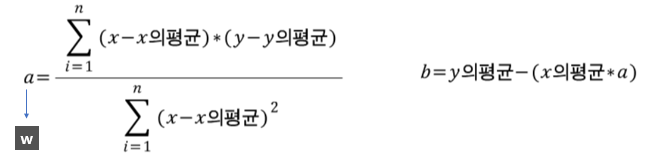

In [2]:
# 주어진 데이터와의 오차를 최소화하는 직선을 구하는 방법

# w,b == w0,w1 (상수항 1개 추가)

In [3]:
x=df['손든횟수'].values
y=df['성적'].values
x,y

(array([1, 2, 3, 1, 1, 3, 1, 3], dtype=int64),
 array([ 90, 100,  80, 100,  88,  77,  55,  85], dtype=int64))

In [6]:
import numpy as np


# x 데이터는 무조건 2d이여야함
xData=np.reshape(x,(-1,1))
xData

array([[1],
       [2],
       [3],
       [1],
       [1],
       [3],
       [1],
       [3]], dtype=int64)

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np

model=LinearRegression()
# 2d 차원으로 바꿔준 x
model.fit(xData,y)
model.coef_, model.intercept_

(array([-0.96363636]), 86.18181818181819)

### -- [작업1] model.coef_와 model.intercept_값을 아래 수식으로 직접 계산해봅니다. --
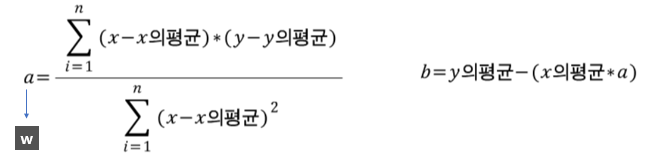

In [8]:
# model.coef_, model.intercept_ 값과 같음

coef=np.sum((x-np.mean(x))*(y-np.mean(y))) / (np.sum((x-np.mean(x))**2))
coef

-0.9636363636363636

In [9]:
np.mean(y)-(np.mean(x)*coef)

86.18181818181819

### -- [작업2] model.coef_와 model.intercept_값을 아래 수식으로 직접 계산해봅니다. --
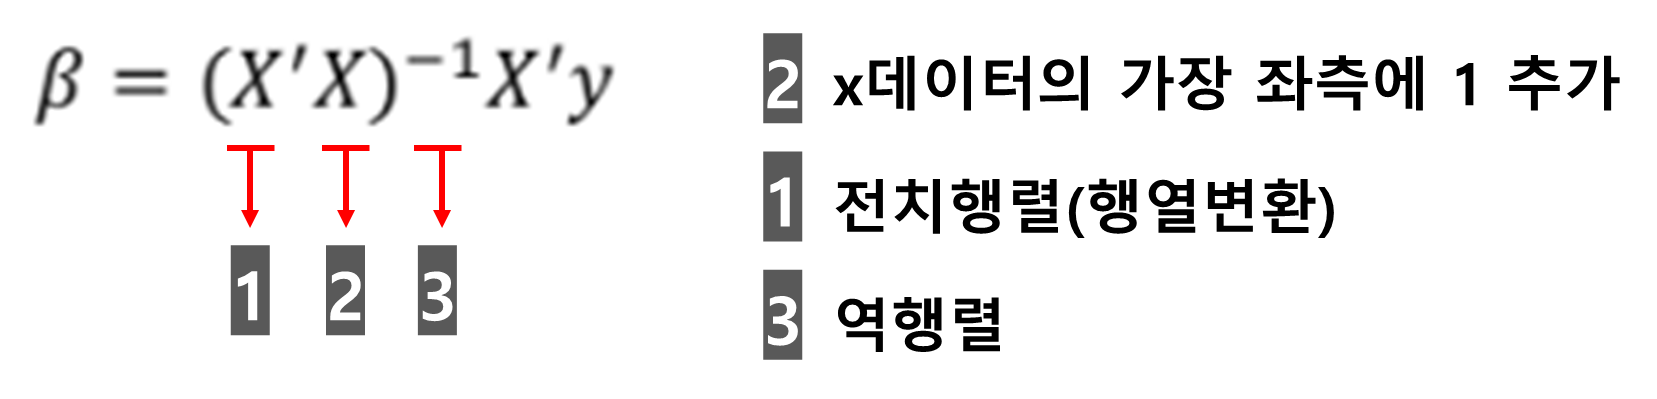

#### 내적곱 (행렬곱)

#### ex) w0, w1, w2 and x0, x1, x2

#### x0, x1, x2    w0  3
####  1   3  4     w1  2
####               w2  3

#### w0*x0 + w1*x1 + w2*x2

#### np.dot(x,w) 함수로 구현되어 있음

In [11]:
# 1 이라는 상수항 추가함
# w,b를 행렬로 계산하기 위함

newX=np.c_[np.ones(len(x)),x]
newX

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 1.],
       [1., 1.],
       [1., 3.],
       [1., 1.],
       [1., 3.]])

In [12]:
# 위의수식 newX의전치행렬*newX
# 8,2 행렬의 newX를 2,8로 전치

계산1=np.dot(newX.T,newX)
계산1

array([[ 8., 15.],
       [15., 35.]])

In [13]:
#계산1의 역행렬
np.random.seed(0)
계산1역행렬= np.linalg.inv(계산1)  
계산1역행렬

array([[ 0.63636364, -0.27272727],
       [-0.27272727,  0.14545455]])

In [14]:
# 최종결과
계산2=np.dot(계산1역행렬,newX.T)
계산3=np.dot(계산2,y)
계산3   ##첫번째값은 b, 두번째는 x1, 세번째는 x2

### 위와 같은 w,b

array([86.18181818, -0.96363636])

### Part2. [다중선형회귀_최소제곱법계산식]
- 위의 작업2방법으로 계산합니다.

In [15]:
df['공지확인횟수']=[1,2,20,7,8,1,2,3]
df

,손든횟수,성적,공지확인횟수
0,1,90,1
1,2,100,2
2,3,80,20
3,1,100,7
4,1,88,8
5,3,77,1
6,1,55,2
7,3,85,3


In [16]:
x=df[['손든횟수','공지확인횟수']].values
y=df['성적'].values

In [17]:
# 사이킷런 모델에서 계산된값
from sklearn.linear_model import LinearRegression
import numpy as np

model=LinearRegression()
model.fit(x,y)
model.coef_, model.intercept_


(array([-1.17727639,  0.12771958]), 85.87993553585818)

In [18]:
# 직접 계산한 최소제곱법
newX=np.c_[np.ones(len(x)),x]
계산1=np.dot(newX.T,newX)
np.random.seed(0)
계산1역행렬= np.linalg.inv(계산1) 
계산2=np.dot(계산1역행렬,newX.T)
계산3=np.dot(계산2,y)
계산3   ##첫번째값은 b, 두번째는 x1, 세번째는 x2

# 이값으로 해석하면 손든횟수가 많을수록 성적은 -1배 감소한다. (-1.17배씩)
# 이값으로 해석하면 공지확인횟수가 많을수혹 성적은 0.1배 증가한다. (0.12배씩)


array([85.87993554, -1.17727639,  0.12771958])

### 함수로 만들기

In [19]:
class linear():

    global coef
    global intercept

    def linear(self,x,y):
        newX=np.c_[np.ones(len(x)),x]
        계산1=np.dot(newX.T,newX)
        np.random.seed(0)
        계산1역행렬= np.linalg.inv(계산1) 
        계산2=np.dot(계산1역행렬,newX.T)
        계산3=np.dot(계산2,y)
        계산3   ##첫번째값은 b, 두번째는 x1, 세번째는 x2

        # for i in range(x.shape[1]):
        #     print("w"+str(i)+" :",계산3[i])
            
        #     if i == x.shape[i]-1:
        #         print("b : ",계산3[i])

        # print("w0 : ",계산3[1]," w1 : ",계산3[2]," b : ",계산3[0])

        coef = 계산3[1:]
        intercept = 계산3[0]

        return 계산3[1:], 계산3[0]
        # w0, w1, b


    def predict(self,x):
        
        return np.dot(coef,x.T)+intercept
    
    def score(self,x,y):
        y_pred = self.predict(x)
        y_true = y

        u = ((y_true-y_pred)**2).sum()
        v = ((y_true-y_true.mean())**2).sum()

        return 1 -(u/v)

In [20]:
x = df[['손든횟수','공지확인횟수']].values
y = df['성적'].values
# print(x.shape)

# 함수 결과 보기

lr = linear()

w, b = lr.linear(x,y)
w, b

(array([-1.17727639,  0.12771958]), 85.87993553585812)

In [21]:
x = df['손든횟수'].values
y = df['성적'].values

w, b = lr.linear(x,y)
w, b

(array([-0.96363636]), 86.1818181818182)

In [22]:
# 사이킷런 모델에서 계산한값 - 예측값

from sklearn.linear_model import LinearRegression
import numpy as np

print(x.shape)
x = x.reshape(-1,1)

model = LinearRegression()
model.fit(x,y)
model.predict(x)

(8,)


array([85.21818182, 84.25454545, 83.29090909, 85.21818182, 85.21818182,
       83.29090909, 85.21818182, 83.29090909])

In [23]:
# 사이킷런 모델에서 계산된 값 score
model.score(x,y)

0.004343288313013671

In [25]:
# 내가 만든 함수에 x데이터 넣으면 계산되는 에측값

predict = np.dot(w,x.T) + b
predict

array([85.21818182, 84.25454545, 83.29090909, 85.21818182, 85.21818182,
       83.29090909, 85.21818182, 83.29090909])

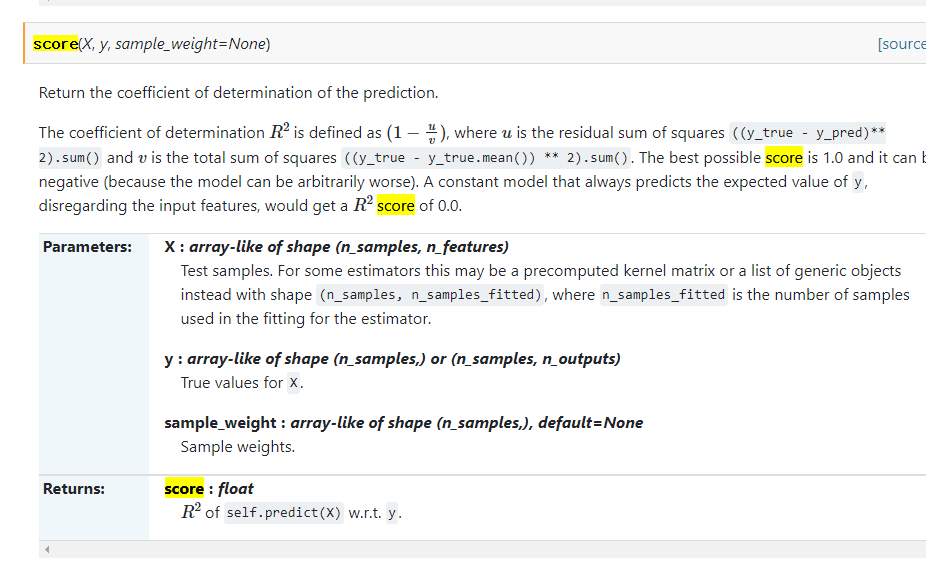

In [93]:
# 내가 만든 함수 스코어

y_pred = predict
y_true = y

u = ((y_true-y_pred)**2).sum()
v = ((y_true-y_true.mean())**2).sum()

In [94]:
# 고전적인 선형회귀 검증 : x값이 활용할 가치가 있는가
# 귀무가설, 대립가설 채택
# 빅데이터는 데이터 자체가 많다보니 맞다라고 생각함
# p-value가 0.05이하일때 쓸모있는 변수

# 100개 중 5개만 다를 때 유의확률 => p-value
# 100개 중 5개는 다르니 분석할 가치가 있다
# 100개 중 50개면 분석할 가치가 없다

In [95]:
# OLS 모듈은 b를 안씀, 상수를 추가해주어야함
# OLS : 쓸모없는 X값들 제거하는 과정
# 회귀 모델을 증명하는 용도

# 잔차의 등분산성
# x변수끼리 상관성이 없어야함

In [97]:
# 선형 회귀 분석 모형평가 => 프로젝트 때

### 규제

In [98]:
# 회귀 계수가 크고, 과적합 되었을때
# 회귀 계수를 줄어거나 없애는 것

In [1]:
# L1 (Lasso) : 절대값 추가
# 불필요한 더미 변수가 많은 변수
# ex) 성별에서 거의 다 여자 일때
# 더미 변수 값이 많은 것은 Lasso

# L2 (Lidge) : 제곱근 추가
# 회귀 계수가 너무 커서 영향력이 너무 클 때

# 엘라스틱넷 회귀
# L1 , L2 를 결합한 회귀

# XGBoost , LGBM 
# w,b의 오차를 최소화는 과정이 포함된 모델
# 캐글에서 성능 평가가 가장 좋았음
# 빅데이터 = XGBoost 임

# 요즘은 AutoML

### Norm

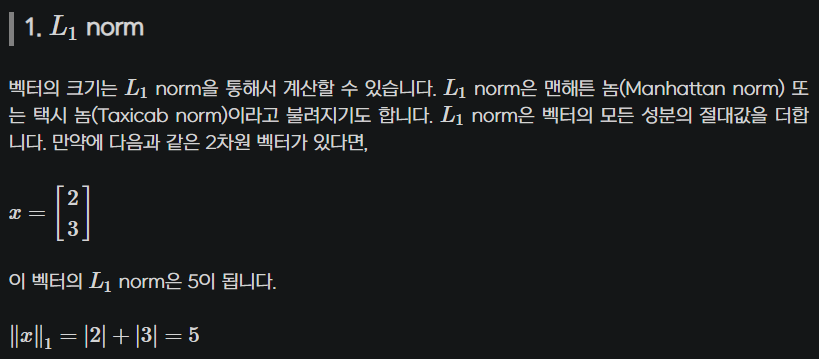

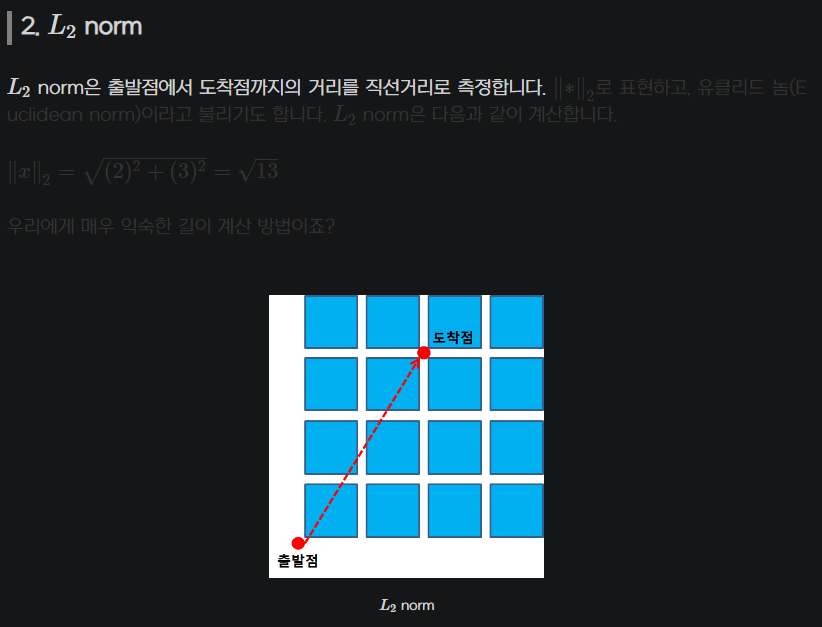

### Gradient Boost

In [2]:
# 경사하강
# (편미분을 통한 오차제곱을 최소화하는 지점을 찾는 모듈)
# w,b 계속 바꿔가면서 갱신함

In [3]:
# Gradient Boost
# LightGBM
# 옵션이 매우 많음
# '토닥토닥 머신러닝'에서 옵션값 확인

### GridSearch

### https://wikidocs.net/84279
### https://wikidocs.net/87220